In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df_hospital = pd.read_csv('../data/hospital_visits.csv')
df_hospital['Week'] = df_hospital.Week.map(str) + "-" + df_hospital.Year.map(str)
df_hospital = df_hospital[['Week', 'Total ILI']]
df_hospital.columns = ['Week', 'ILI']
df_hospital = df_hospital[28:256]
df_hospital = df_hospital.reset_index(drop=True)
df_hospital

,Week,ILI
0,15-2015,12311
1,16-2015,11021
2,17-2015,11311
3,18-2015,10946
4,19-2015,9891
...,...,...
223,30-2019,7755
224,31-2019,7851
225,32-2019,8031
226,33-2019,8933


In [4]:
df_twitter = pd.read_csv('../data/twitter-flu-data.csv', header=None)
df_twitter.columns = ['Year', 'Week', '1', '2', '3', '4', '5', '6', '7']
df_twitter['Week'] = df_twitter.Week.map(str) + "-" + df_twitter.Year.map(str)
df_twitter['Tweets'] = df_twitter[['1', '2', '3', '4', '5', '6', '7']].sum(axis=1)
df_twitter = df_twitter[['Week', 'Tweets']][27:-1]
df_twitter = df_twitter.reset_index(drop=True)
df_twitter

,Week,Tweets
0,15-2015,429
1,16-2015,386
2,17-2015,352
3,18-2015,387
4,19-2015,450
...,...,...
223,30-2019,367
224,31-2019,321
225,32-2019,354
226,33-2019,292


In [5]:
df_us = pd.read_csv('../data/USA_flu_virus_counts.csv')
df_us['Week'] = df_us.Week.map(str) + "-" + df_us.Year.map(str)
df_us = df_us[['Week', 'ALL_INF']]
df_us = df_us[786+27:1042]
df_us = df_us.drop(851)
df_us = df_us.reset_index(drop=True)
df_us

,Week,ALL_INF
0,15-2015,1472
1,16-2015,1127
2,17-2015,772
3,18-2015,609
4,19-2015,527
...,...,...
223,30-2019,253
224,31-2019,248
225,32-2019,222
226,33-2019,265


In [6]:
df_aus = pd.read_csv('../data/AUS_flu_virus_counts.csv')
df_aus['Week'] = df_aus.Week.map(str) + "-" + df_aus.Year.map(str)
df_aus = df_aus[['Week', 'ALL_INF']]
df_aus = df_aus[912:1168-27]
df_aus = df_aus.drop(977)
df_aus = df_aus.reset_index(drop=True)
df_aus

,Week,ALL_INF
0,40-2014,72
1,41-2014,58
2,42-2014,29
3,43-2014,28
4,44-2014,24
...,...,...
223,3-2019,125
224,4-2019,97
225,5-2019,110
226,6-2019,106


In [7]:
df_google = pd.read_csv('../data/flu_trends_past5years.csv')
df_google['Week'] = df_google.Week.map(str) + "-" + df_google.Year.map(str)
df_google = df_google[['Week', 'Searches']]
df_google = df_google[21:250]
df_google = df_google.drop(86)
df_google.reset_index(drop=True)
df_google

,Week,Searches
21,15-2015,9
22,16-2015,9
23,17-2015,7
24,18-2015,6
25,19-2015,6
...,...,...
245,30-2019,4
246,31-2019,5
247,32-2019,5
248,33-2019,7


In [8]:
list_hospital = list(df_hospital['ILI'])
list_tweets = list(df_twitter['Tweets'])
list_us = list(df_us['ALL_INF'])
list_aus = list(df_aus['ALL_INF'])
list_google = list(df_google['Searches'])

In [9]:
list_hospital_real = list_hospital[:-52]
list_tweets_real = list_tweets[:-52]
list_us_real = list_us[:-52]
list_aus_real = list_aus[:-52]
list_google_real = list_google[:-52]

list_hospital_pred = list_hospital[-52:]
list_tweets_pred = list_tweets[-52:]
list_us_pred = list_us[-52:]
list_aus_pred = list_aus[-52:]
list_google_pred = list_google[-52:]

In [10]:
features = [list_tweets_real, list_aus_real, list_google_real]
pred = [list_tweets_pred, list_aus_pred, list_google_pred]

features = list(map(list, zip(*features)))
pred = list(map(list, zip(*pred)))

In [11]:
model = SARIMAX(endog=list_hospital_real, exog=features, order=(1, 1, 0), seasonal_order=(1, 1, 0, 52))
model_fit = model.fit()

In [12]:
# make prediction
future = 52
predictions = model_fit.predict(len(list_hospital_real), len(list_hospital_real) + future - 1, exog=pred)
print(predictions)
future_weeks = list(range(len(list_hospital_real), len(list_hospital_real) + future))
# future_weeks

[ 6721.62839125  7144.49745378  8446.7138324   8503.41419502
  9006.92060181 14761.68882228 16424.97816488 16187.03169036
 18640.33488043 19402.00152064 20909.55575072 23537.3910302
 21286.47782546 23986.71483486 25184.06510828 29780.01863392
 39990.77263084 41440.18309224 40702.09374241 40886.66083806
 39965.63163782 54349.67075259 68499.51599894 71806.70605773
 65647.2840111  46921.52135397 32643.44291626 28285.60735654
 21314.68703325 20377.83139446 18391.80692149 17367.30587175
 15874.99271901 14078.26043734 13765.11663816 13289.76454957
 12408.75396079 13185.6657908  12415.06642325 11163.93229496
  9555.27516923  9996.60316826  9614.67087723  7642.40422827
  7020.36593126  7699.50367168  7384.51214202  7395.74877067
  7668.20028655  6610.00060503  8129.41906652  7993.27641826]


In [13]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions')

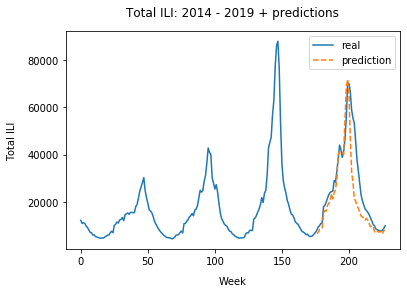

In [14]:
plt.plot(df_hospital['ILI'], label='real')
plt.plot(predictions_df, '--', label='prediction')
plt.legend()
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions", pad=15)

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -1146.463
Date:                            Mon, 09 Dec 2019   AIC                           2304.926
Time:                                    21:27:13   BIC                           2321.799
Sample:                                         0   HQIC                          2311.780
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.9873      2.862     -2.442      0.015     -12.596      -1.378
x2             7.7240      4.037      1.913      0.056      -0.188      15.636
x3           247.7459     56.428      4.390      0.000     137.149     358.343
ar.L1          0.3554      0.117      3.025      0.002       0.125       0.586
ar.S.L52      -0.0698      0.151     -0.461      0.645      -0.366       0.227
sigma2      7.503e+06   5.61e+05     13.364      0.000     6.4e+06     8.6e+06
===================================================================================
Ljung-Box (Q):                       17.76   Jarque-Bera (JB):              1213.11
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.27   Skew:                            -2.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Total ILI + Features: 2014 - 2019')

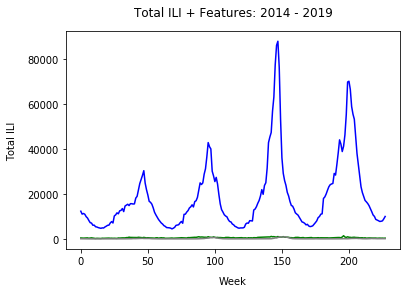

In [16]:
plt.plot(list_hospital, c='blue')
plt.plot(list_tweets, c='green')
plt.plot(list_aus, c='gray')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI + Features: 2014 - 2019", pad=15)